# Loading dataset

In [68]:
# from huggingface_hub import notebook_login
# notebook_login()

In [69]:
# !pip3 install datasets
from datasets import load_dataset
df = load_dataset("samsum")

In [70]:
df

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [71]:
import json

with open(r"DatasetRead\DatasetRead\test.json", encoding="utf8") as f:
    test_data = json.load(f)

with open(r"DatasetRead\DatasetRead\train.json", encoding="utf8") as f:
    train_data = json.load(f)

with open(r"DatasetRead\DatasetRead\val.json", encoding="utf8") as f:
    val_data = json.load(f)

train_dict = {
    "train":train_data
}

validation_dict = {
    "validation":val_data
}

test_dict = {
    "test":test_data
}


In [72]:
import pandas as pd
# train_df = pd.DataFrame(df['train']).drop(columns = 'id')
# validation_df = pd.DataFrame(df['validation']).drop(columns = 'id')
# test_df = pd.DataFrame(df['test']).drop(columns='id')
train_df = pd.DataFrame([[v for k, v in item.items()]for item in train_dict['train']], columns=["id", "summary", "dialogue"])
validation_df = pd.DataFrame([[v for k, v in item.items()]for item in validation_dict['validation']], columns=["id", "summary", "dialogue"])
test_df = pd.DataFrame([[v for k, v in item.items()]for item in test_dict['test']], columns=["id", "summary", "dialogue"])

In [73]:
train_df = train_df.drop(columns = 'id')
validation_df = validation_df.drop(columns = 'id')
test_df = test_df.drop(columns='id')

In [74]:
validation_df

,summary,dialogue
0,A will go to the animal shelter tomorrow to ge...,"A: Hi Tom, are you busy tomorrow’s afternoon?\..."
1,Emma and Rob love the advent calendar. Lauren ...,Emma: I’ve just fallen in love with this adven...
2,Madison is pregnant but she doesn't want to ta...,Jackie: Madison is pregnant\r\nJackie: but she...
3,Marla found a pair of boxers under her bed.,Marla: <file_photo>\r\nMarla: look what I foun...
4,Robert wants Fred to send him the address of t...,Robert: Hey give me the address of this music ...
...,...,...
813,Carla's date for graduation is on June 4th. Di...,Carla: I've got it...\r\nDiego: what?\r\nCarla...
814,Bev is going on the school trip with her son. ...,"Gita: Hello, this is Beti's Mum Gita, I wanted..."
815,Greg cheated on Julia. He apologises to her. R...,"Julia: Greg just texted me\r\nRobert: ugh, del..."
816,Marry broke her nail and has a party tomorrow....,"Marry: I broke my nail ;(\r\nTina: oh, no!\r\n..."


In [75]:
print(f"This is train dataset description: \n {train_df.describe()}")
print(f"This is validation dataset description: \n {validation_df.describe()}")
print(f"This is test dataset description: \n {test_df.describe()}")

This is train dataset description: 
                                                   summary  \
count                                               14732   
unique                                              14730   
top     Seth's pet Oreo that he got when he was 10 is ...   
freq                                                    2   

                                                 dialogue  
count                                               14732  
unique                                              14265  
top     Jimmy: Hey, guess what? My car's completely ka...  
freq                                                    4  
This is validation dataset description: 
                                                   summary  \
count                                                 818   
unique                                                818   
top     A will go to the animal shelter tomorrow to ge...   
freq                                                    1   

         

In [76]:
test_df.head(2)

,summary,dialogue
0,Hannah needs Betty's number but Amanda doesn't...,"Hannah: Hey, do you have Betty's number?\nAman..."
1,Eric and Rob are going to watch a stand-up on ...,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...


### Number of tokens of original data

Maximum token number

In [77]:
import numpy as np

def find_max_length(text):
    max_length = np.max([len(text_row) for text_row in text])
    return max_length

train_dialogue_max_length = find_max_length(train_df['dialogue'])
print(f"This is train dialogue token max length: {train_dialogue_max_length}")
train_summary_max_length = find_max_length(train_df['summary'])
print(f"This is train summary token max length: {train_summary_max_length}")

validation_dialogue_max_length = find_max_length(validaiton_df['dialogue'])
print(f"This is validation token max length: {validation_dialogue_max_length}")
validation_summary_max_length = find_max_length(validaiton_df['summary'])
print(f"This is validation summary token max length: {validation_summary_max_length}")

test_dialogue_max_length = find_max_length(test_df['dialogue'])
print(f"This is test dialogue token max length: {test_dialogue_max_length}")
test_summary_max_length = find_max_length(test_df['summary'])
print(f"This is test summary token max length: {test_summary_max_length}")

This is train dialogue token max length: 5492
This is train summary token max length: 300
This is validation token max length: 2952
This is validation summary token max length: 314
This is test dialogue token max length: 2793
This is test summary token max length: 300


C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1933311421.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1933311421.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1933311421.py:20: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1933311421.py:29: UserWarning: set_ticklabels() should only be used

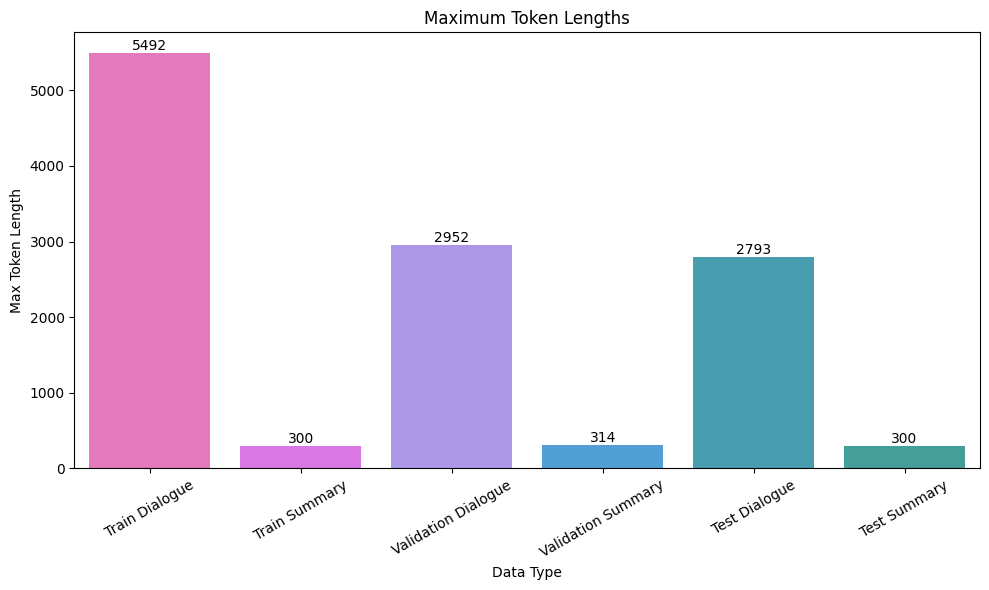

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for number of tokens
train_dialogue_max_length = 5492
train_summary_max_length = 300
validation_dialogue_max_length = 2952
validation_summary_max_length = 314
test_dialogue_max_length = 2793
test_summary_max_length = 300

# Labels and values
labels = ['Train Dialogue', 'Train Summary', 'Validation Dialogue', 'Validation Summary', 'Test Dialogue', 'Test Summary']
values = [train_dialogue_max_length, train_summary_max_length, validation_dialogue_max_length, validation_summary_max_length, test_dialogue_max_length, test_summary_max_length]

# Plotting
palette = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
ax.set_title("Maximum Token Lengths")
ax.set_xlabel('Data Type')
ax.set_ylabel('Max Token Length')

# Adding values on top of bars
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()

# Show plot
plt.show()

Average token number

In [79]:
import numpy as np

def find_avg_length(text):
    avg_length = np.average([len(text_row) for text_row in text])
    return avg_length

train_dialogue_avg_length = find_avg_length(train_df['dialogue'])
print(f"This is train dialogue token avg length: {train_dialogue_avg_length}")
train_summary_avg_length = find_avg_length(train_df['summary'])
print(f"This is train summary token avg length: {train_summary_avg_length}")

validation_dialogue_avg_length = find_avg_length(validaiton_df['dialogue'])
print(f"This is validation token avg length: {validation_dialogue_avg_length}")
validation_summary_avg_length = find_avg_length(validaiton_df['summary'])
print(f"This is validation summary token avg length: {validation_summary_avg_length}")

test_dialogue_avg_length = find_avg_length(test_df['dialogue'])
print(f"This is test dialogue token avg length: {test_dialogue_avg_length}")
test_summary_avg_length = find_avg_length(test_df['summary'])
print(f"This is test summary token avg length: {test_summary_avg_length}")

This is train dialogue token avg length: 511.18361390171054
This is train summary token avg length: 110.13467282106978
This is validation token avg length: 480.68581907090464
This is validation summary token avg length: 108.78606356968216
This is test dialogue token avg length: 521.5982905982906
This is test summary token avg length: 108.78021978021978


C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\4060181388.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\4060181388.py:24: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\4060181388.py:24: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\4060181388.py:33: UserWarning: set_ticklabels() should only be used

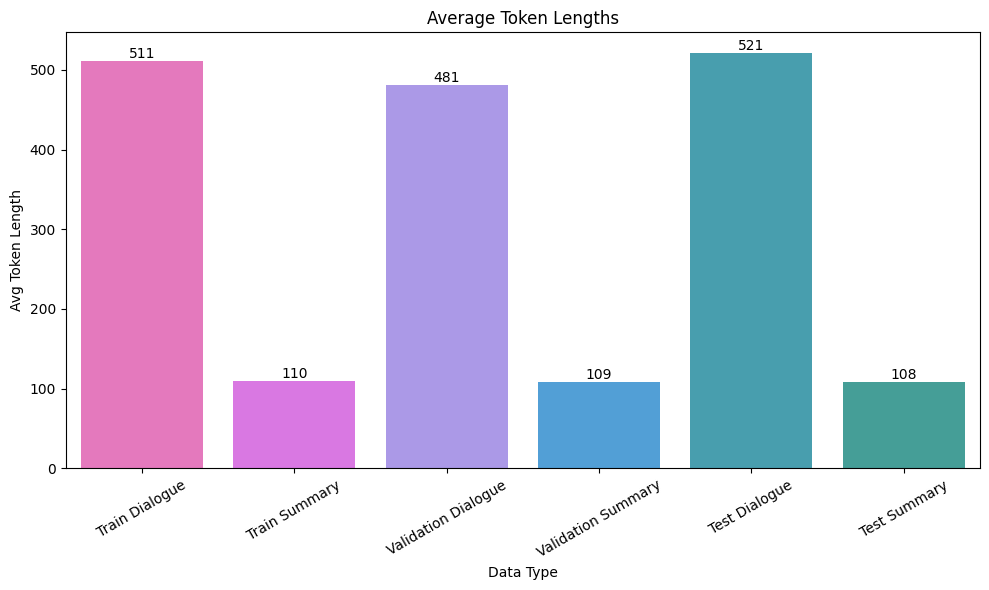

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Plotting average number of tokens of the dataset
'''

# Data for number of tokens
train_dialogue_avg_length = 511
train_summary_avg_length = 110
validation_dialogue_avg_length = 481
validation_summary_avg_length = 109
test_dialogue_avg_length = 521
test_summary_avg_length = 108

# Labels and values
labels = ['Train Dialogue', 'Train Summary', 'Validation Dialogue', 'Validation Summary', 'Test Dialogue', 'Test Summary']
values = [train_dialogue_avg_length, train_summary_avg_length, validation_dialogue_avg_length, validation_summary_avg_length, test_dialogue_avg_length, test_summary_avg_length]

# Plotting
palette = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
ax.set_title("Average Token Lengths")
ax.set_xlabel('Data Type')
ax.set_ylabel('Avg Token Length')

# Adding values on top of bars
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()

# Show plot
plt.show()

# Data Preprocessing

### Lowercasing the text

In [81]:
def lowercase(dialogue, summary):
  return dialogue.lower(), summary.lower()

### Contraction expansion

In [82]:
# ! pip install contractions

In [83]:
import contractions

def expand_contractions(dialogue, summary):
  # list of words after expansion
  expanded_d = []
  expanded_s = []

  d_words_list =  dialogue.split() # split the sentences into words
  s_words_list = summary.split() # split the sentences into words

  for word1 in d_words_list:
    expanded_d.append(contractions.fix(word1)) # expanding the dialogue
  for word2 in s_words_list:
    expanded_s.append(contractions.fix(word2)) # expanding the summary

  expanded_sentence_d = " ".join(expanded_d) # put words back into sentences
  expanded_sentence_s = " ".join(expanded_s) # put words back into sentences

  return expanded_sentence_d, expanded_sentence_s


### Abbreviation expansion

In [84]:
# !pip install abbreviations_py

In [85]:
# from abbreviations_py.textes.abbreviator import fix, update_abbreviations

# # expand abbreviations like gr8 -> great, ttyl -> talk to you later
# def fix_abbreviations(dialogue, summary):
#   fixed_dialogue = fix(dialogue)
#   fixed_summary = fix(summary)

In [86]:

import json

def normalize_abb(text):
    abb_dict = json.loads(open('abbreviations.json', 'r', encoding="utf-8").read())
    # print("Normalizing abbreviations and alternative spelling")
    return normalize_abb_text(text, abb_dict)

def normalize_abb_text(text, abbreviations):
    return " ".join([abbreviations[word] if word in abbreviations.keys() else word for word in text.split()])


### Removing punctuation

In [87]:
import string
import nltk
# from nltk import pos_tag
# from nltk.corpus import wordnet

nltk.download('punkt')

punctuations = list(string.punctuation)
punctuations.append('’')
punctuations.append("”")
punctuations.append("“")
punctuations= "".join(punctuations)

def remove_punctuations(dialogue, summary):
  dialogue = dialogue.translate(str.maketrans(' ',' ',punctuations))
  summary = summary.translate(str.maketrans(' ',' ',punctuations))
  return dialogue, summary

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seoeunl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Removing Stopwords

In [88]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words('english'))

def remove_stopword(dialogue, summary):
  d_words_list =  dialogue.split() # split the sentences into words
  s_words_list = summary.split() # split the sentences into words
  for word in d_words_list:
    if word not in stops:
      dialogue = " ".join(word)

  for word in s_words_list:
    if word not in stops:
      summary = " ".join(word)

  return dialogue, summary

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seoeunl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Removing Special Characters

In [106]:
import re

# def is_special_present(token):
#     if len(token)>1:
#         return False
#     else:
#         return ord(token)<32 or ord(token)>127 #true for special characters

# special_chars = []
# for token in train_df['dialogue']:
#     for ch in token:
#       if is_special_present(ch):
#           special_chars.append(ch)

# print("Total number of special characters: ", len(special_chars))
# print("Special characters: ", special_chars)

def remove_specials(dialogue, summary):
  filtered_dialogue=re.sub('[^A-Za-z0-9.]+', ' ', dialogue)
  filtered_summary=re.sub('[^A-Za-z0-9.]+', ' ', summary)
  return filtered_dialogue, filtered_summary

### Cleaning text

In [100]:
def clean_text(dialogue, summary):
    cleaned_dialogues:list = []
    cleaned_summaries:list = []
    for idx in range(len(dialogue)):
      cleaned_dialogue, cleaned_summary = lowercase(dialogue[idx], summary[idx])
      cleaned_dialogue, cleaned_summary = expand_contractions(cleaned_dialogue, cleaned_summary)
      cleaned_dialogue = normalize_abb(cleaned_dialogue)
      cleaned_summary = normalize_abb(cleaned_summary)
      cleaned_dialogue, cleaned_summary = remove_punctuations(cleaned_dialogue, cleaned_summary)
      cleaned_dialogue, cleaned_summary = remove_specials(cleaned_dialogue, cleaned_summary)
      cleaned_dialogues.append(cleaned_dialogue)
      cleaned_summaries.append(cleaned_summary)
    return cleaned_dialogues, cleaned_summaries

In [101]:
train_dialogue, train_summary = clean_text(train_df['dialogue'], train_df['summary'])
validation_dialogue, validation_summary = clean_text(validation_df['dialogue'], validation_df['summary'])
test_dialogue, test_summary = clean_text(test_df['dialogue'], test_df['summary'])
# print(f"This is train dialogue and summary: {train_dialogue, train_summary}")
# print(f"This is validation dialogue and summary: {validation_dialogue, validation_summary}")
# print(f"This is test dialogue and summary: {test_dialogue, test_summary}")

In [102]:
print(test_dialogue[1])

eric machine rob that is significant other great eric i know and shows how americans see russian rob and it is really funny eric i know i especially like the train part rob hahaha no one talks to the machine like that eric is this his only standup rob i do not know i will check eric sure rob turns out no there are some of his standups on youtube eric great i will watch them now rob me too eric machine rob machine eric talk to you later rob sure


In [93]:
# formatting cleaned data back into df
train_df = pd.DataFrame({'dialogue':train_dialogue, 'summary':train_summary})
validaiton_df = pd.DataFrame({'dialogue':validation_dialogue, 'summary':validation_summary})
test_df = pd.DataFrame({'dialogue':test_dialogue, 'summary':test_summary})

In [94]:
test_df.head(2)

,dialogue,summary
0,hannah hey do you have bettys number amanda le...,hannah needs bettys number but amanda does not...
1,eric machine rob that is significant other gr8...,eric and rob are going to watch a standup on y...


### Number of tokens after cleaning data

In [95]:
import numpy as np

"""
Maximum number of tokens after cleaning data
"""

def find_max_length(text):
    max_length = np.max([len(text_row) for text_row in text])
    return max_length

train_dialogue_max_length = find_max_length(train_df['dialogue'])
print(f"This is train dialogue token max length: {train_dialogue_max_length}")
train_summary_max_length = find_max_length(train_df['summary'])
print(f"This is train summary token max length: {train_summary_max_length}")

validation_dialogue_max_length = find_max_length(validaiton_df['dialogue'])
print(f"This is validation token max length: {validation_dialogue_max_length}")
validation_summary_max_length = find_max_length(validaiton_df['summary'])
print(f"This is validation summary token max length: {validation_summary_max_length}")

test_dialogue_max_length = find_max_length(test_df['dialogue'])
print(f"This is test dialogue token max length: {test_dialogue_max_length}")
test_summary_max_length = find_max_length(test_df['summary'])
print(f"This is test summary token max length: {test_summary_max_length}")

This is train dialogue token max length: 4059
This is train summary token max length: 333
This is validation token max length: 2952
This is validation summary token max length: 314
This is test dialogue token max length: 2786
This is test summary token max length: 314


C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\237026039.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\237026039.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\237026039.py:20: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\237026039.py:29: UserWarning: set_ticklabels() should only be used wit

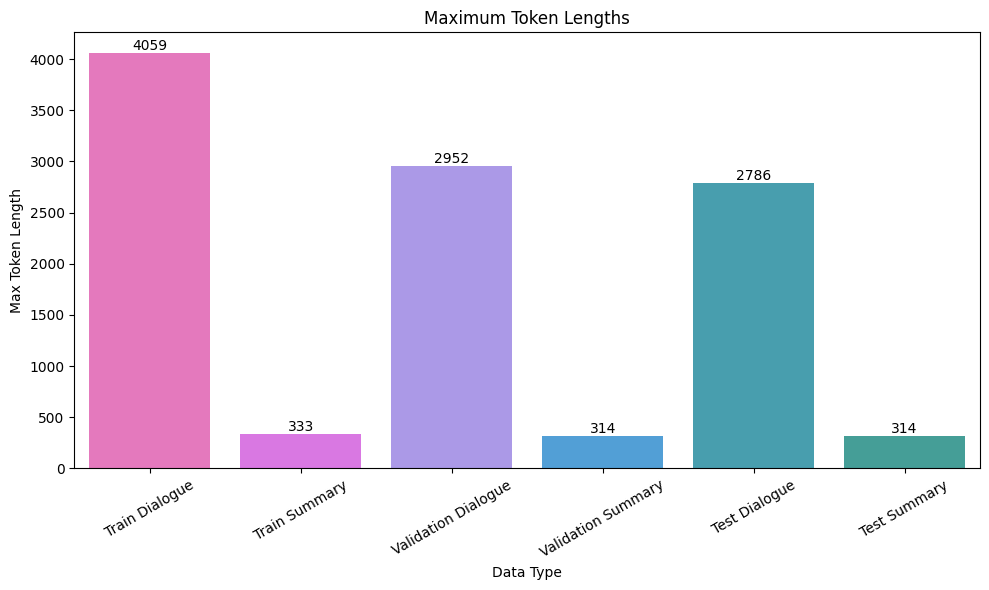

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for number of tokens
train_dialogue_max_length = 4059
train_summary_max_length = 333
validation_dialogue_max_length = 2952
validation_summary_max_length = 314
test_dialogue_max_length = 2786
test_summary_max_length = 314

# Labels and values
labels = ['Train Dialogue', 'Train Summary', 'Validation Dialogue', 'Validation Summary', 'Test Dialogue', 'Test Summary']
values = [train_dialogue_max_length, train_summary_max_length, validation_dialogue_max_length, validation_summary_max_length, test_dialogue_max_length, test_summary_max_length]

# Plotting
palette = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
ax.set_title("Maximum Token Lengths")
ax.set_xlabel('Data Type')
ax.set_ylabel('Max Token Length')

# Adding values on top of bars
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()

# Show plot
plt.show()

In [97]:
import numpy as np

"""
Average number of tokens after cleaning data
"""

def find_avg_length(text):
    avg_length = np.average([len(text_row) for text_row in text])
    return avg_length

train_dialogue_avg_length = find_avg_length(train_df['dialogue'])
print(f"This is train dialogue token avg length: {train_dialogue_avg_length}")
train_summary_avg_length = find_avg_length(train_df['summary'])
print(f"This is train summary token avg length: {train_summary_avg_length}")

validation_dialogue_avg_length = find_avg_length(validaiton_df['dialogue'])
print(f"This is validation token avg length: {validation_dialogue_avg_length}")
validation_summary_avg_length = find_avg_length(validaiton_df['summary'])
print(f"This is validation summary token avg length: {validation_summary_avg_length}")

test_dialogue_avg_length = find_avg_length(test_df['dialogue'])
print(f"This is test dialogue token avg length: {test_dialogue_avg_length}")
test_summary_avg_length = find_avg_length(test_df['summary'])
print(f"This is test summary token avg length: {test_summary_avg_length}")

This is train dialogue token avg length: 492.05104534347
This is train summary token avg length: 108.96327721965788
This is validation token avg length: 480.68581907090464
This is validation summary token avg length: 108.78606356968216
This is test dialogue token avg length: 501.8376068376068
This is test summary token avg length: 107.52503052503053


C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1246369315.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1246369315.py:20: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1246369315.py:20: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
C:\Users\seoeunl\AppData\Local\Temp\ipykernel_51128\1246369315.py:29: UserWarning: set_ticklabels() should only be used

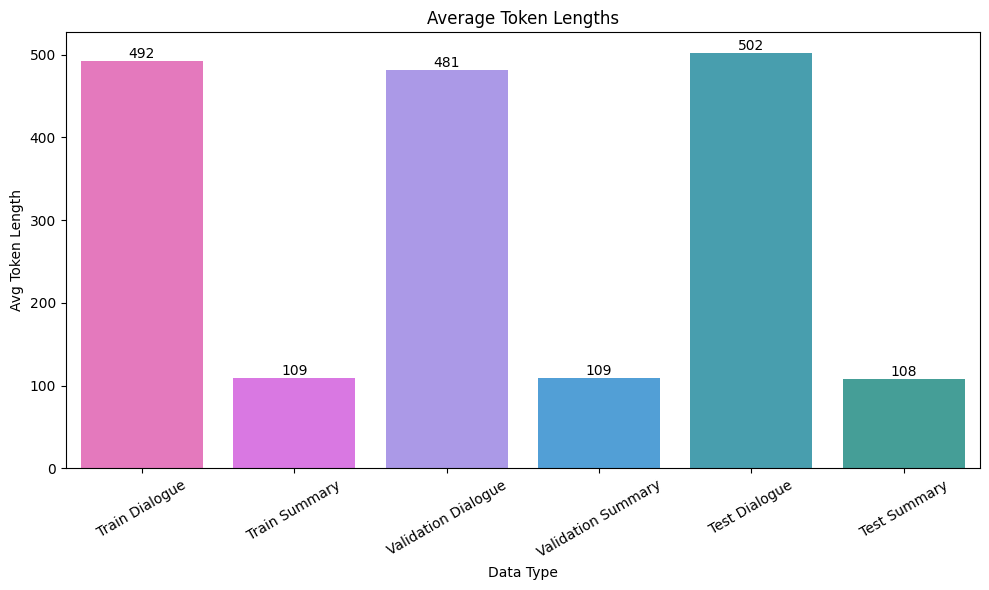

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for number of tokens
train_dialogue_avg_length = 492
train_summary_avg_length = 109
validation_dialogue_avg_length = 481
validation_summary_avg_length = 109
test_dialogue_avg_length = 502
test_summary_avg_length = 108

# Labels and values
labels = ['Train Dialogue', 'Train Summary', 'Validation Dialogue', 'Validation Summary', 'Test Dialogue', 'Test Summary']
values = [train_dialogue_avg_length, train_summary_avg_length, validation_dialogue_avg_length, validation_summary_avg_length, test_dialogue_avg_length, test_summary_avg_length]

# Plotting
palette = sns.color_palette("husl", 12)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=labels, y= values, palette=np.array(palette[::-1]), legend=False)
ax.set_title("Average Token Lengths")
ax.set_xlabel('Data Type')
ax.set_ylabel('Avg Token Length')

# Adding values on top of bars
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.tight_layout()

# Show plot
plt.show()

# Library imports for text encoding, training

In [26]:
import os
import time
import glob
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# !pip install git+https://github.com/PyTorchLightning/pytorch-lightning
# !pip install torchtext==0.17.2 pytorch-lightning==2.0.0

In [28]:

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)
from tqdm.auto import tqdm

In [29]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_theme(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize']=16,10

# Text Encoding - T5

In [66]:
MODEL_NAME_T5 = 't5-base'
tokenizer_T5 = T5Tokenizer.from_pretrained(MODEL_NAME_T5)

In [67]:
#creating pytorch dataset
class SummaryDatasetT5(Dataset):
  def __init__(self, data: pd.DataFrame, tokenizer:T5Tokenizer, text_max_token_len: int = 1024, summary_max_token_len: int = 256):
    self.tokenizer = tokenizer
    self.data = data
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len
  def __len__(self):
    return len(self.data)

  def __getitem__(self,index: int):
    data_row = self.data.iloc[index]

    text = data_row['dialogue']

    text_encoding = tokenizer_T5(
        text,
        max_length=self.text_max_token_len, #max length=512
        padding='max_length',
        truncation=True,
        return_attention_mask = True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    summary_encoding = tokenizer_T5(
        data_row['summary'],
        max_length=self.summary_max_token_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )

    labels = summary_encoding['input_ids']
    # Ensure we have correct labels for T5 generation
    labels[labels==0] = -100

    return dict(
        text=text,
        summary=data_row['summary'],
        text_input_ids=text_encoding['input_ids'].flatten(),
        text_attention_mask=text_encoding['attention_mask'].flatten(),
        labels=labels.flatten(),
        labels_attention_mask=summary_encoding['attention_mask'].flatten()
    )

# Datamodule creation - T5
Contain steps needed for processing data

In [68]:
class SummaryDataModuleT5(pl.LightningDataModule):
  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: T5Tokenizer,
      batch_size: int = 8,
      text_max_token_len: int=1024,
      summary_max_token_len: int=256
  ):
      super().__init__()

      self.train_df = train_df
      self.test_df = test_df
      self.batch_size = batch_size
      self.tokenizer = tokenizer
      self.text_max_token_len = text_max_token_len
      self.summary_max_token_len = summary_max_token_len

  def setup(self, stage=None):
    self.train_dataset = SummaryDatasetT5(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
    self.test_dataset = SummaryDatasetT5(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )

In [69]:
text_token_counts, summary_token_counts = [], []

for _, row in train_df.iterrows():
  text_token_count = len(tokenizer_T5.encode(row['dialogue']))
  text_token_counts.append(text_token_count)

  summary_token_count = len(tokenizer_T5.encode(row['summary']))
  text_token_counts.append(summary_token_count)

<Axes: >

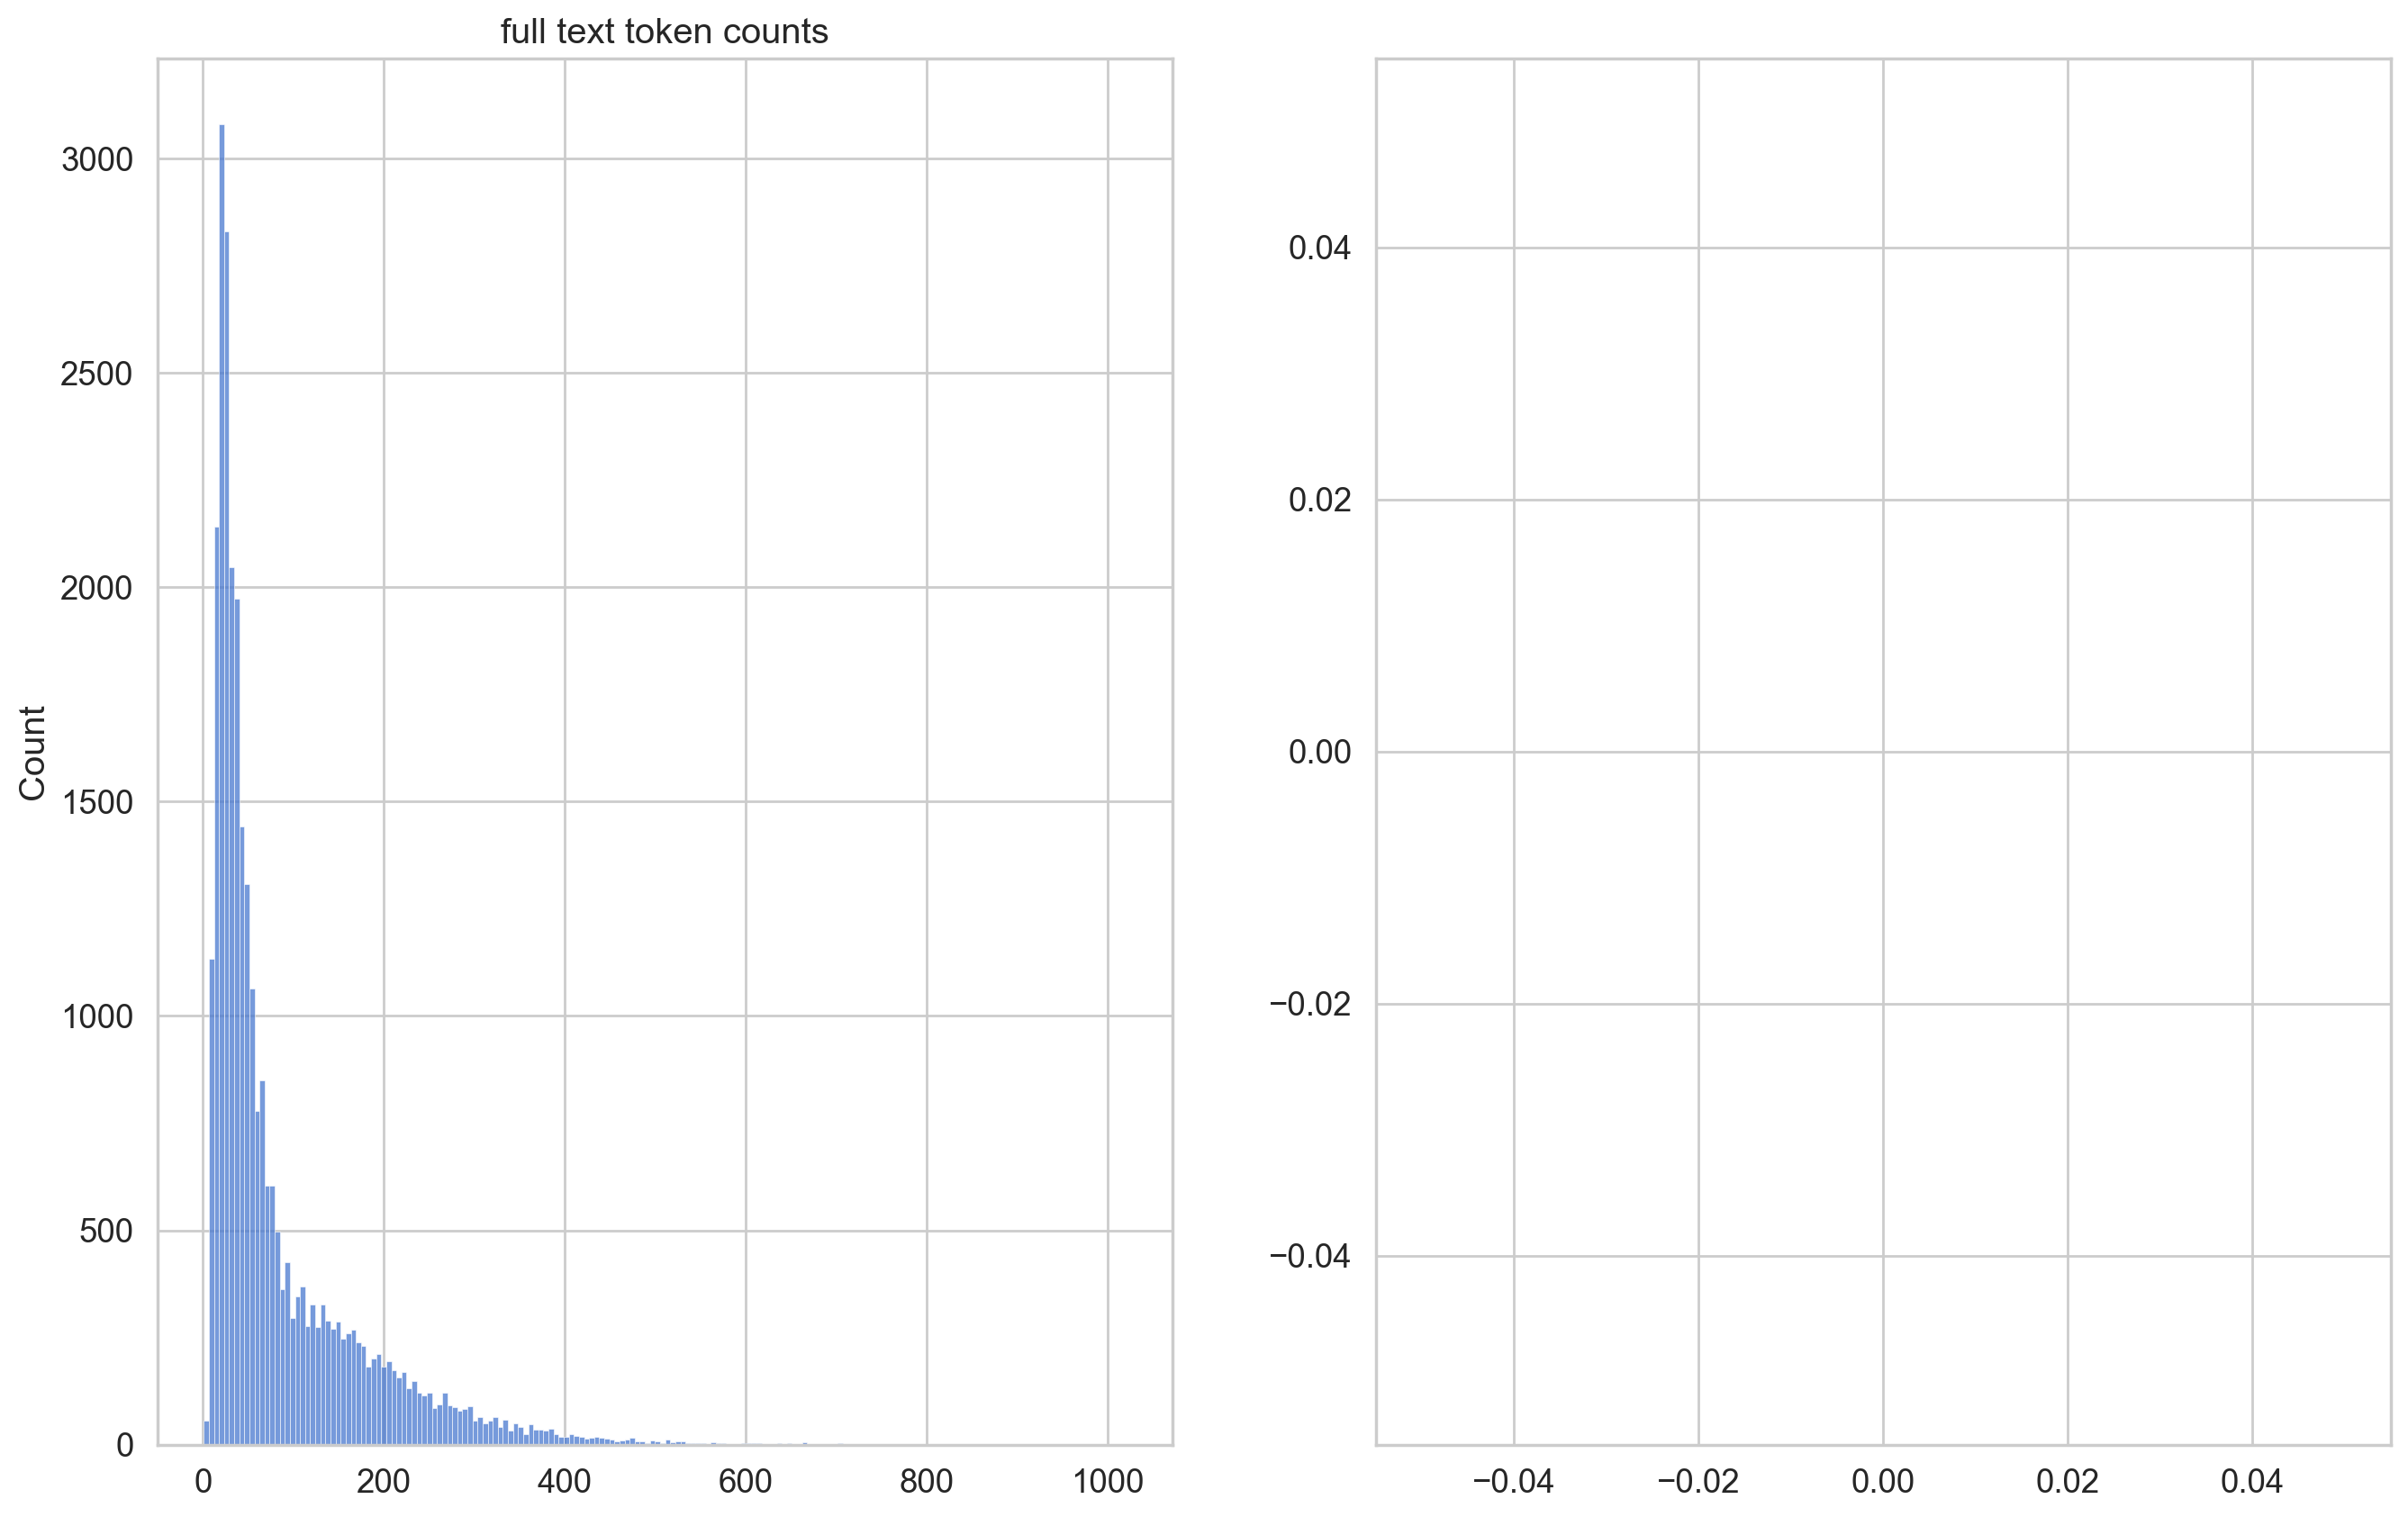

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(text_token_counts, ax=ax1)
ax1.set_title('full text token counts')
sns.histplot(summary_token_counts, ax=ax2)

In [71]:
N_EPOCHS = 8
BATCH_SIZE = 8

data_module_t5 = SummaryDataModuleT5(train_df, test_df, tokenizer_T5, batch_size=BATCH_SIZE)

In [72]:
data_module_t5

# Model Architecture - T5

In [73]:
class SummaryT5(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME_T5, return_dict=True)

  def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
    # print("FORWARD")
    output=self.model(
        input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=decoder_attention_mask
    )

    return output.loss, output.logits

  def training_step(self, batch, batch_size):
    # print("TRAINING")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask= labels_attention_mask,
        labels=labels
    )

    self.log("train_loss", loss, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_size):
    # print("VALIDATION")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_size):
    # print("TEST")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss

  def configure_optimizers(self):
      optimizer = torch.optim.AdamW(self.parameters(), lr=2e-5)
      return [optimizer]

In [74]:
model_T5 = SummaryT5()

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [75]:
# %load_ext tensorboard
# %tensorboard --logdir lightning_logs/
# %reload_ext tensorboard

In [76]:
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

logger = TensorBoardLogger("lightning_logs", name='news-summary')

trainer = pl.Trainer(
    logger=logger,
    callbacks=[checkpoint_callback],
    max_epochs=N_EPOCHS,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [77]:
torch.cuda.empty_cache() #clear any cache

In [78]:
import gc
gc.collect() #clear any garbage collector

901

### Training - T5

In [79]:
trainer.fit(model_T5, data_module_t5)

You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estim

Sanity Checking: 0it [00:00, ?it/s]

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the

Training: 0it [00:00, ?it/s]

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


### Save the model

In [ ]:
# Additional information
PATH = "\model_t5.pt"


torch.save({
            'epoch': N_EPOCHS,
            'model_state_dict': model_T5.state_dict(),
            }, PATH)

In [ ]:

trained_model = SummaryT5.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path #load the best model using checkpoint
)
trained_model.freeze()

### Summarize the text

In [ ]:
# summarize the text
def summarizeText(text):
  text_encoding = tokenizer_T5(
      text,
      max_length=1024,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors='pt'
  )

  generated_ids = trained_model.model.generate(
      input_ids=text_encoding['input_ids'],
      attention_mask = text_encoding['attention_mask'],
      max_length=256, # maximum output text length
      num_beams=2, #using beam search
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
  )

#decoded values
  preds_t5 = [
      tokenizer_T5.decode(gen_id,skip_special_tokens=True, clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
  ]
  return "".join(preds_t5)

### Evaluation using Rouge - T5

In [ ]:
import evaluate

rouge_score = evaluate.load("rouge")

In [ ]:

def compute_metrics():
    # Compute ROUGE scores
    result = rouge_score.compute(predictions=preds_t5, use_stemmer=True)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
def print_summary():
    data = []
    for r in range(len(test_df)):
        row = test_df.iloc[r]
        dia_row = row['dialogue']
        sum_row = row['summary'] #actual summary from the dataset
        gen_summary = summarizeText(dia_row) #generated summary for article
        score = rouge_score.compute(predictions=[gen_summary], references=[sum_row])
        scores = {k: round(v, 4) for k, v in score.items()}
        data.append([dia_row, sum_row, gen_summary, scores])
        print(f"'>>> Dialogue: {dia_row}'")
        print(f"\n'>>> Summary: {sum_row}'")
        print(f"\n'>>> Generated Summary: {gen_summary}'")
        print(f"\n'>>> ROUGE Score: {scores}'")
    result=pd.DataFrame(data, columns=['dialogues', 'original summary', "generated summary", "score"])
    return result


In [ ]:
result_df=print_summary()

### Saving the results in a csv file - T5

In [ ]:
# save the results as a csv file
pd.DataFrame.from_records(result_df).to_csv('results_t5.csv', header=["dialogue","original_summary","generated summary","rouge_score"], index=False)

# Text Encoding - BART

In [80]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [81]:
model_checkpoint = "facebook/bart-base"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
# model = BartForConditionalGeneration.from_pretrained(model_checkpoint)

In [82]:
#creating pytorch dataset
class SummaryDatasetBart(Dataset):
  def __init__(self, data: pd.DataFrame, tokenizer:AutoTokenizer, text_max_token_len: int = 1024, summary_max_token_len: int = 256):
    self.tokenizer = tokenizer
    self.data = data
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len
  def __len__(self):
    return len(self.data)

  def __getitem__(self,index: int):
    data_row = self.data.iloc[index]

    text = data_row['dialogue']

    text_encoding = tokenizer(
        text,
        max_length=self.text_max_token_len, #max length=512
        padding='max_length',
        truncation=True,
        return_attention_mask = True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    summary_encoding = tokenizer(
        data_row['summary'],
        max_length=self.summary_max_token_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )

    labels = summary_encoding['input_ids']

    return dict(
        text=text,
        summary=data_row['summary'],
        text_input_ids=text_encoding['input_ids'].flatten(),
        text_attention_mask=text_encoding['attention_mask'].flatten(),
        labels=labels.flatten(),
        labels_attention_mask=summary_encoding['attention_mask'].flatten()
    )

# Datamodule creation - BART
Contain steps needed for processing data

In [83]:
class SummaryDataModuleBart(pl.LightningDataModule):
  def __init__(
      self,
      train_df: pd.DataFrame,
      test_df: pd.DataFrame,
      tokenizer: AutoTokenizer,
      batch_size: int = 0,
      text_max_token_len: int=1024,
      summary_max_token_len: int=256
  ):
      super().__init__()

      self.train_df = train_df
      self.test_df = test_df
      self.batch_size = batch_size
      self.tokenizer = tokenizer
      self.text_max_token_len = text_max_token_len
      self.summary_max_token_len = summary_max_token_len

  def setup(self, stage=None):
    self.train_dataset = SummaryDatasetBart(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
    self.test_dataset = SummaryDatasetBart(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )
  def val_dataloader(self):
    return DataLoader(
        self.test_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=0
    )

In [84]:
text_token_counts, summary_token_counts = [], []

for _, row in train_df.iterrows():
  text_token_count = len(tokenizer.encode(row['dialogue']))
  text_token_counts.append(text_token_count)

  summary_token_count = len(tokenizer.encode(row['summary']))
  text_token_counts.append(summary_token_count)

<Axes: >

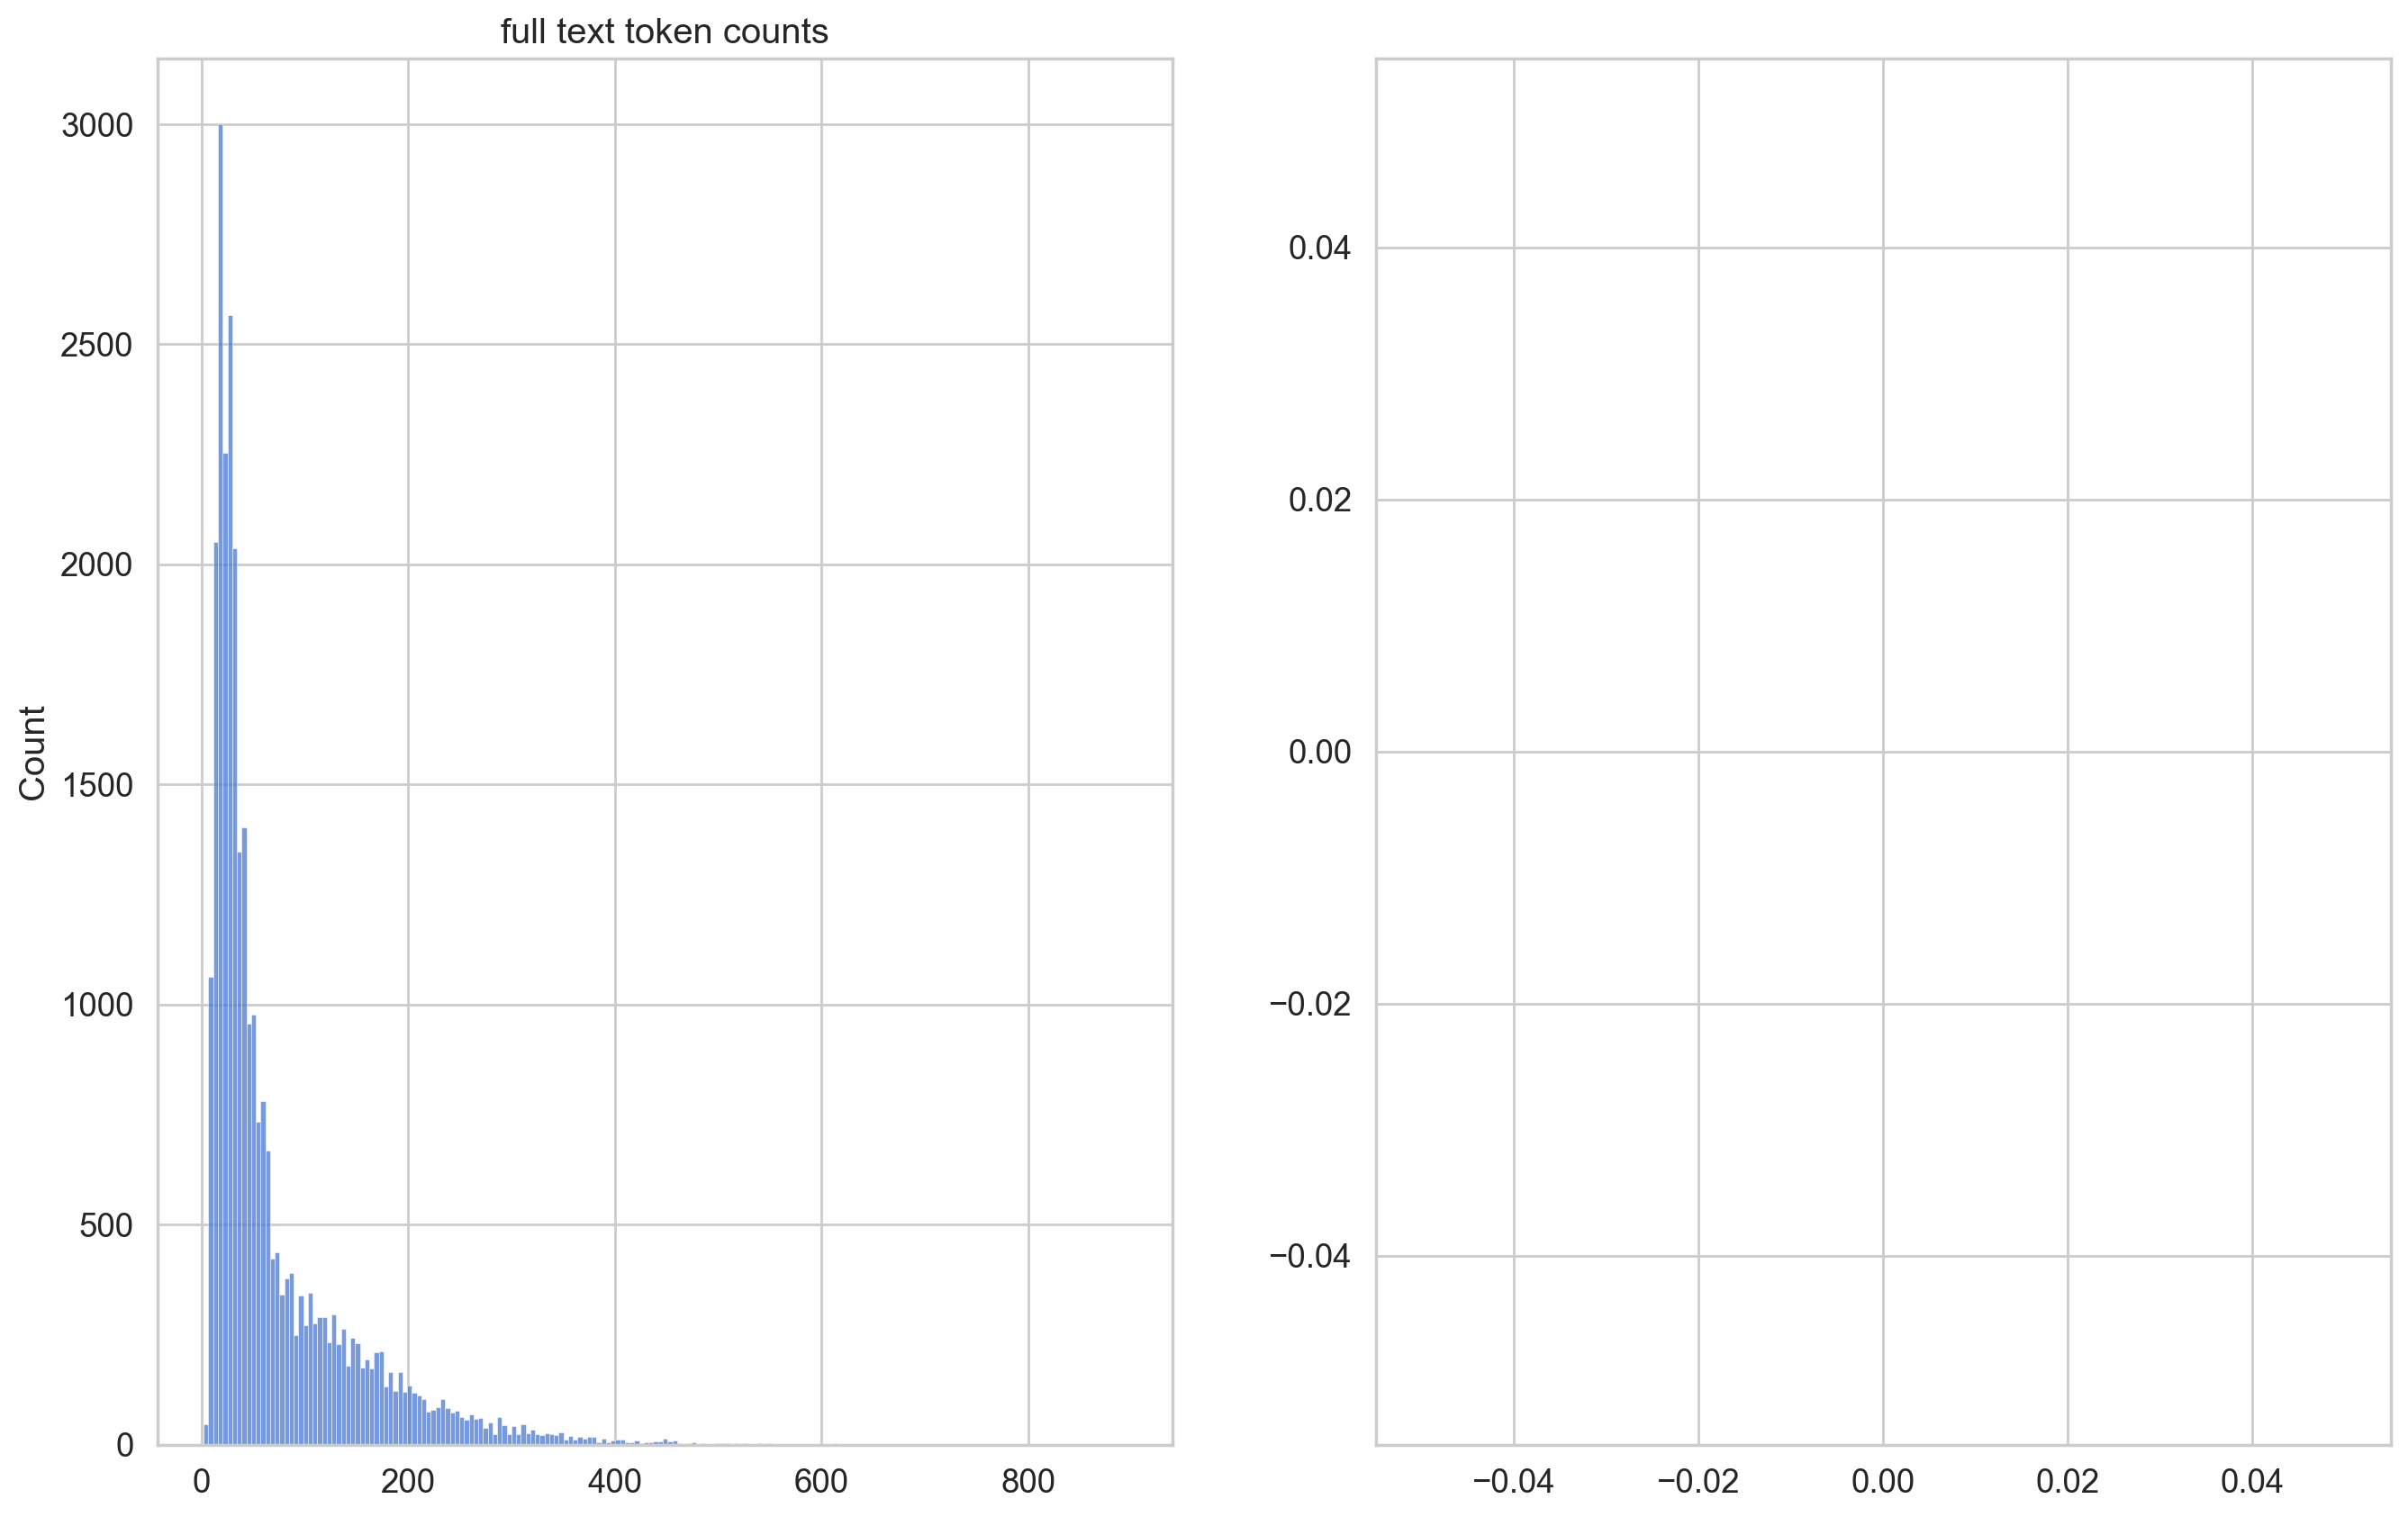

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(text_token_counts, ax=ax1)
ax1.set_title('full text token counts')
sns.histplot(summary_token_counts, ax=ax2)

In [86]:
N_EPOCHS = 8
BATCH_SIZE = 8

data_module_bart = SummaryDataModuleBart(train_df, test_df, tokenizer, batch_size=BATCH_SIZE)

# Model - BART

In [87]:
class SummaryModelBart(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint, return_dict=True)
  
  def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
    # print("FORWARD")
    output=self.model(
        input_ids,
        attention_mask=attention_mask,
        labels=labels,
        decoder_attention_mask=decoder_attention_mask
    )
  
    return output.loss, output.logits

  def training_step(self, batch, batch_size):
    # print("TRAINING")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask= labels_attention_mask,
        labels=labels
    )

    self.log("train_loss", loss, prog_bar=True, logger=True)
    return loss

  def validation_step(self, batch, batch_size):
    # print("VALIDATION")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("val_loss", loss, prog_bar=True, logger=True)
    return loss
  def test_step(self, batch, batch_size):
    # print("TEST")
    input_ids = batch['text_input_ids']
    attention_mask = batch['text_attention_mask']
    labels = batch['labels']
    labels_attention_mask = batch['labels_attention_mask']

    loss, outputs = self(
        input_ids=input_ids,
        attention_mask=attention_mask,
        decoder_attention_mask=labels_attention_mask,
        labels=labels
    )

    self.log("test_loss", loss, prog_bar=True, logger=True)
    return loss
  
  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=2e-5)
    return [optimizer]

In [88]:
model_bart = SummaryModelBart()

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [89]:
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='val_loss',
    mode='min'
)

logger = TensorBoardLogger("lightning_logs", name='news-summary')

trainer = pl.Trainer(
    logger=logger,
    # checkpoint_callback=checkpoint_callback,
    max_epochs=N_EPOCHS,

)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [90]:
torch.cuda.empty_cache() #clear any cache

In [91]:
import gc
gc.collect() #clear any garbage collector

96

In [92]:
# with torch.no_grad():
trainer.fit(model_bart, data_module_bart)

You are using a CUDA device ('NVIDIA GeForce RTX 4070 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\bart\modeling_bart.py:590: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)

Training: 0it [00:00, ?it/s]

c:\Users\seoeunl\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
PATH = "\model_bart.pt"

torch.save({
            'epoch': N_EPOCHS,
            'model_state_dict': model_bart.state_dict(),
            }, PATH)

In [ ]:
trained_model = SummaryModelBart.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path #load the best model using checkpoint
)
trained_model.freeze()

In [ ]:
# summarize the text
def summarizeText(text):
  text_encoding = tokenizer(
      text,
      max_length=1024,
      padding='max_length',
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors='pt'
  )

  generated_ids = trained_model.model.generate(
      input_ids=text_encoding['input_ids'],
      attention_mask = text_encoding['attention_mask'],
      max_length=256, # maximum output text length
      num_beams=2, #using beam search
      repetition_penalty=2.5,
      length_penalty=1.0,
      early_stopping=True
  )

#decoded values
  preds_bart = [
      tokenizer.decode(gen_id,skip_special_tokens=True, clean_up_tokenization_spaces=True)
      for gen_id in generated_ids
  ]
  return "".join(preds_bart)

# Evaluation using Rouge - BART

In [ ]:
def compute_metrics():
    result = rouge_score.compute(predictions=model_bart, use_stemmer=True)
    
    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
def print_summary():
    data = []
    for r in range(len(test_df)):
        row = test_df.iloc[r]
        dia_row = row['dialogue']
        sum_row = row['summary'] #actual summary from the dataset
        gen_summary = summarizeText(dia_row) #generated summary for article
        score = rouge_score.compute(predictions=[gen_summary], references=[sum_row])
        scores = {k: round(v, 4) for k, v in score.items()}
        data.append([dia_row, sum_row, gen_summary, scores])
        print(f"'>>> Dialogue: {dia_row}'")
        print(f"\n'>>> Summary: {sum_row}'")
        print(f"\n'>>> Generated Summary: {gen_summary}'")
        print(f"\n'>>> ROUGE Score: {scores}'")
    result=pd.DataFrame(data, columns=['dialogues', 'original summary', "generated summary", "score"])
    return result

In [ ]:
result_bart = print_summary()

In [ ]:
pd.DataFrame.from_records(result_bart).to_csv('results_bart.csv', header=["article","original_summary","generated summary","rouge_score"], index=False)